In [320]:
import pandas as pd
data_path = '../Materials/data/'
data = pd.read_csv(data_path+'Cas3.csv')
print(data)

           ra        dec    xki    eta  radius  signal  noise      vr  e_vr  \
0    9.110458  51.553471  4.214 -0.375   4.280   435.2   53.9 -378.51  4.09   
1    9.107375  51.529472  4.099 -1.815   5.475   228.9   45.4 -384.33  4.79   
2    9.104167  51.534363  3.979 -1.522   5.009   293.5   44.7 -374.51  4.50   
3    9.101584  51.534973  3.882 -1.485   4.888   290.2   43.1 -382.39  4.68   
4    9.087042  51.554085  3.340 -0.338   3.408   209.3   46.6 -383.44  5.11   
..        ...        ...    ...    ...     ...     ...    ...     ...   ...   
207  8.921500  51.551640 -2.835 -0.485   2.996   430.6   49.3 -371.11  3.98   
208  8.895667  51.524887 -3.799 -2.090   5.648   217.1   52.3 -349.61  5.30   
209  8.888958  51.525250 -4.049 -2.068   5.788   348.4   53.2 -364.68  4.54   
210  8.883792  51.559387 -4.242 -0.020   4.242   304.3   48.9 -379.24  4.27   
211  9.003250  51.546307  0.214 -0.805   1.624   234.6   49.0 -376.93  4.97   

     P(member)  
0         1.00  
1         1.00  


In [356]:
data.sample(n=int(len(data)*0.1))

,ra,dec,xki,eta,radius,signal,noise,vr,e_vr,P(member)
189,9.105792,51.529278,4.039,-1.827,5.447,412.5,58.2,-364.83,4.22,1.0
22,9.007417,51.573055,0.370,0.800,1.642,279.7,48.8,-379.34,2.77,1.0
5,9.076167,51.522415,2.934,-2.238,5.353,260.9,43.2,-362.85,4.59,1.0
178,9.220667,51.512859,8.325,-2.812,10.046,432.5,53.1,-369.22,4.25,1.0
30,8.958959,51.565918,-1.438,0.372,1.619,305.7,48.2,-369.12,4.49,1.0
92,8.963625,51.559971,-1.264,0.015,1.264,367.2,50.5,-379.27,4.15,1.0
147,9.044375,51.567082,1.749,0.442,1.959,236.8,41.9,-381.98,4.96,1.0
207,8.921500,51.551640,-2.835,-0.485,2.996,430.6,49.3,-371.11,3.98,1.0
88,8.985917,51.554501,-0.432,-0.313,0.761,449.9,51.8,-375.08,4.04,1.0
3,9.101584,51.534973,3.882,-1.485,4.888,290.2,43.1,-382.39,4.68,1.0


In [358]:
import numpy as np
def lnG(x,x0,sig) :
    return -(x-x0)**2/(2*sig**2)-np.log(sig)

In [360]:
vr = np.array(data['vr'])
Vr = np.linspace(-380,-360,512)
SIG = np.linspace(8,12,512)
result = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result = result/np.max(result)

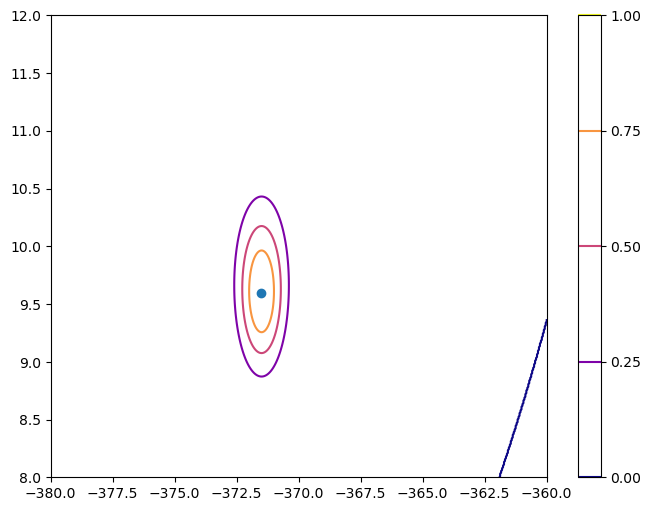

In [361]:
import matplotlib.pyplot as plt
#plt.imshow(result)
plt.figure(figsize=(8, 6))

contour = plt.contour(Vr, SIG, result, levels=3, cmap = 'plasma') 
plt.scatter(Vr[np.argmax(result)%len(result[0])],SIG[np.argmax(result)//len(result)])
plt.colorbar(contour)

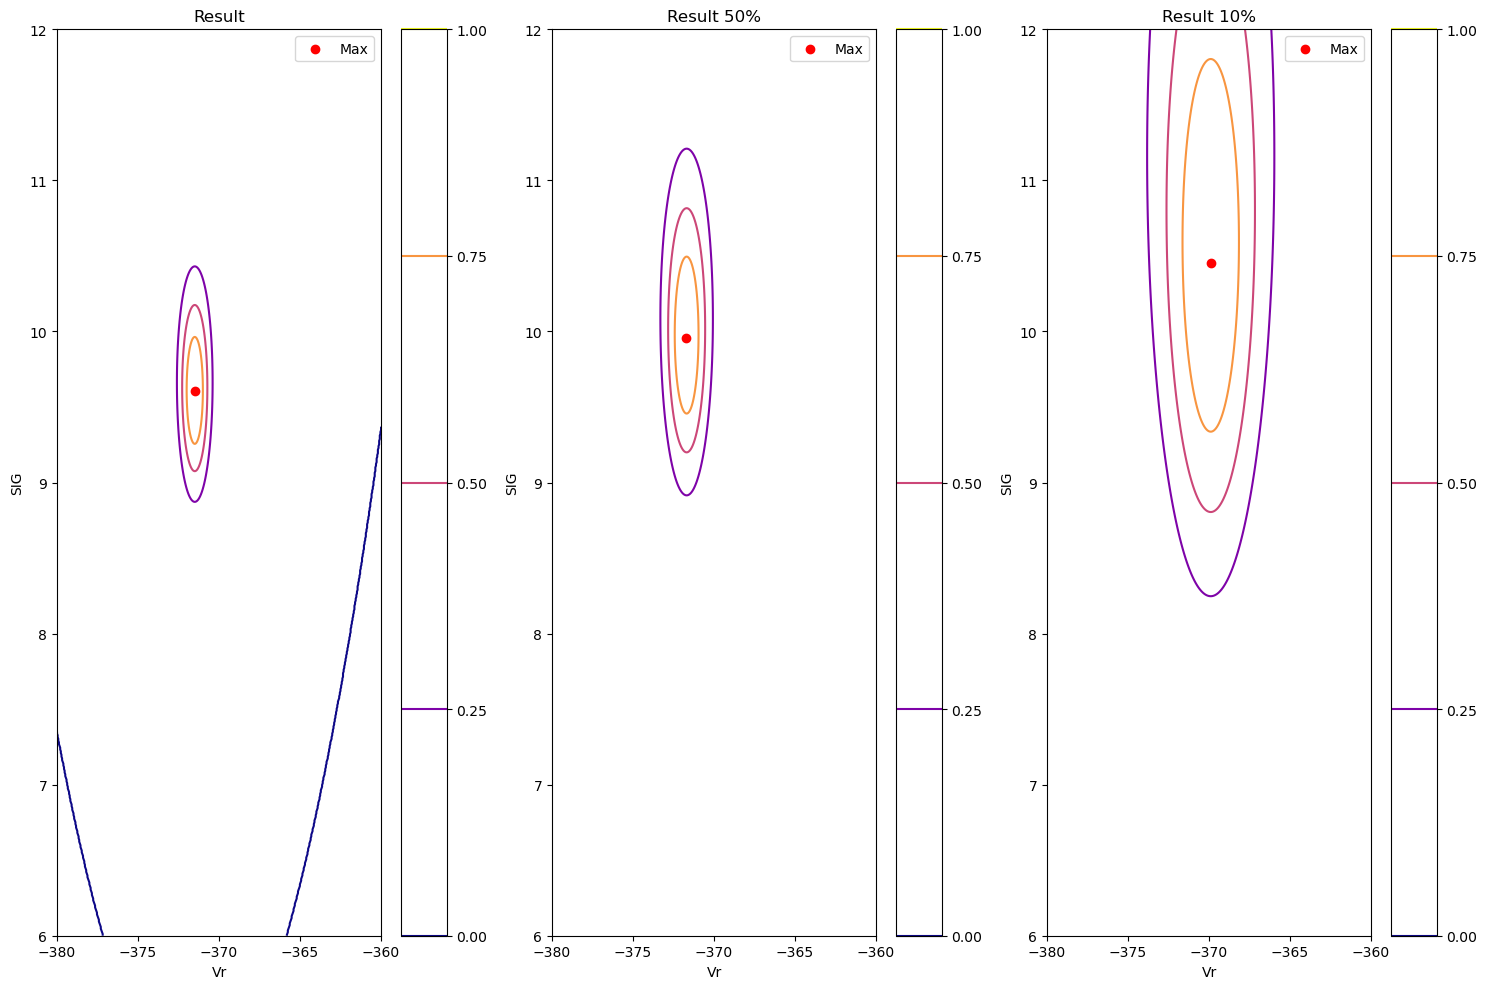

In [390]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_path = '../Materials/data/'
data = pd.read_csv(data_path+'Cas3.csv')

import numpy as np
def lnG(x,x0,sig) :
    return -(x-x0)**2/(2*sig**2)-np.log(sig)

vr = np.array(data['vr'])
Vr = np.linspace(-380,-360,512)
SIG = np.linspace(6,12,512)
result = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result = result/np.max(result)

data = pd.read_csv(data_path+'Cas3.csv')
data = data.sample(n=int(len(data)*0.5))

vr = np.array(data['vr'])
Vr = np.linspace(-380,-360,512)
result50 = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result50 = result50/np.max(result50)

data = pd.read_csv(data_path+'Cas3.csv')
data = data.sample(n=int(len(data)*0.1))

vr = np.array(data['vr'])
Vr = np.linspace(-380,-360,512)
result10 = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result10 = result10/np.max(result10)



# 创建 1行3列 的子图布局
fig, axes = plt.subplots(1, 3, figsize=(15, 10))  # (width, height) 调整整体画布大小

# 定义统一的 levels 和 cmap（可选）
levels = 3
cmap = 'plasma'

# --- 第1个子图：result ---
ax1 = axes[0]
contour1 = ax1.contour(Vr, SIG, result, levels=levels, cmap=cmap)
ax1.scatter(Vr[np.argmax(result) % len(result[0])], 
           SIG[np.argmax(result) // len(result)], 
           color='red', label='Max')
ax1.set_title("Result")
ax1.set_xlabel("Vr")
ax1.set_ylabel("SIG")
ax1.legend()
fig.colorbar(contour1, ax=ax1)  # 为第1个子图添加 colorbar

# --- 第2个子图：result50 ---
ax2 = axes[1]
contour2 = ax2.contour(Vr, SIG, result50, levels=levels, cmap=cmap)
ax2.scatter(Vr[np.argmax(result50) % len(result50[0])], 
            SIG[np.argmax(result50) // len(result50)], 
            color='red', label='Max')
ax2.set_title("Result 50%")
ax2.set_xlabel("Vr")
ax2.set_ylabel("SIG")
ax2.legend()
fig.colorbar(contour2, ax=ax2)  # 为第2个子图添加 colorbar

# --- 第3个子图：result10 ---
ax3 = axes[2]
contour3 = ax3.contour(Vr, SIG, result10, levels=levels, cmap=cmap)
ax3.scatter(Vr[np.argmax(result10) % len(result10[0])], 
            SIG[np.argmax(result10) // len(result10)], 
            color='red', label='Max')
ax3.set_title("Result 10%")
ax3.set_xlabel("Vr")
ax3.set_ylabel("SIG")
ax3.legend()
fig.colorbar(contour3, ax=ax3)  # 为第3个子图添加 colorbar

# 调整子图间距，避免重叠
plt.tight_layout()
plt.show()

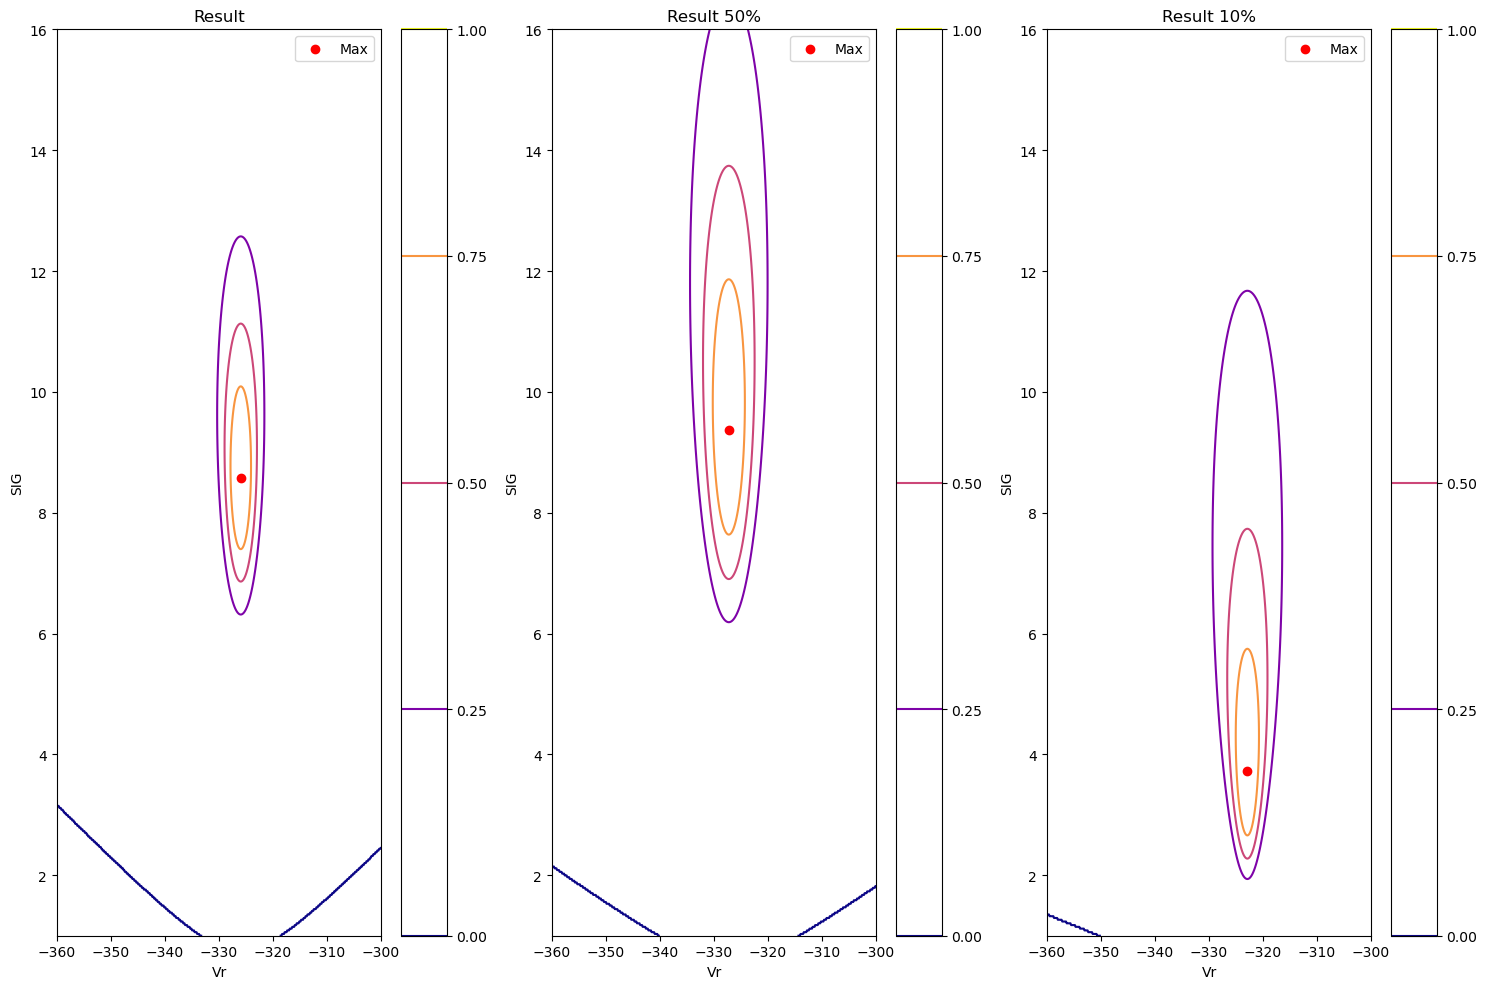

In [396]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_path = '../Materials/data/'
data = pd.read_csv(data_path+'Per1.csv')

import numpy as np
def lnG(x,x0,sig) :
    return -(x-x0)**2/(2*sig**2)-np.log(sig)

vr = np.array(data['vr'])
Vr = np.linspace(-360,-300,512)
SIG = np.linspace(1,16,512)
result = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result = result/np.max(result)

data = pd.read_csv(data_path+'Per1.csv')
data = data.sample(n=int(len(data)*0.5))

vr = np.array(data['vr'])
result50 = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result50 = result50/np.max(result50)

data = pd.read_csv(data_path+'Per1.csv')
data = data.sample(n=int(len(data)*0.2))

vr = np.array(data['vr'])
result10 = np.e**np.sum(lnG(vr[np.newaxis,np.newaxis,:],Vr[np.newaxis,:,np.newaxis],SIG[:,np.newaxis,np.newaxis]),axis=2)
result10 = result10/np.max(result10)



# 创建 1行3列 的子图布局
fig, axes = plt.subplots(1, 3, figsize=(15, 10))  # (width, height) 调整整体画布大小

# 定义统一的 levels 和 cmap（可选）
levels = 3
cmap = 'plasma'

# --- 第1个子图：result ---
ax1 = axes[0]
contour1 = ax1.contour(Vr, SIG, result, levels=levels, cmap=cmap)
ax1.scatter(Vr[np.argmax(result) % len(result[0])], 
           SIG[np.argmax(result) // len(result)], 
           color='red', label='Max')
ax1.set_title("Result")
ax1.set_xlabel("Vr")
ax1.set_ylabel("SIG")
ax1.legend()
fig.colorbar(contour1, ax=ax1)  # 为第1个子图添加 colorbar

# --- 第2个子图：result50 ---
ax2 = axes[1]
contour2 = ax2.contour(Vr, SIG, result50, levels=levels, cmap=cmap)
ax2.scatter(Vr[np.argmax(result50) % len(result50[0])], 
            SIG[np.argmax(result50) // len(result50)], 
            color='red', label='Max')
ax2.set_title("Result 50%")
ax2.set_xlabel("Vr")
ax2.set_ylabel("SIG")
ax2.legend()
fig.colorbar(contour2, ax=ax2)  # 为第2个子图添加 colorbar

# --- 第3个子图：result10 ---
ax3 = axes[2]
contour3 = ax3.contour(Vr, SIG, result10, levels=levels, cmap=cmap)
ax3.scatter(Vr[np.argmax(result10) % len(result10[0])], 
            SIG[np.argmax(result10) // len(result10)], 
            color='red', label='Max')
ax3.set_title("Result 10%")
ax3.set_xlabel("Vr")
ax3.set_ylabel("SIG")
ax3.legend()
fig.colorbar(contour3, ax=ax3)  # 为第3个子图添加 colorbar

# 调整子图间距，避免重叠
plt.tight_layout()
plt.show()